# What where the most fatal activities involved in shark attacks by year ?

## The code

In [15]:
#IMPORT DATA

import pandas as pd
import os
os.chdir(r'\Users\Sacha.dolle\Desktop\Cours IH\Week 2\project')
attacks=pd.read_csv('attacks.csv', sep=',', encoding ='latin1')

In [18]:
def hist_year(attacks):

    #DATA CLEANING
    
    ##1. Columns : Select the columns for the analysis

    attacks=attacks[['Date', 'Year', 'Type', 'Country', 'Area', 'Location','Activity', 'Name', 'Sex ', 'Age', 'Fatal (Y/N)', 'Time', 'Species ']]

    attacks=attacks.rename(columns={'Fatal (Y/N)' : 'fatal'})
    fatal_error=attacks.loc[~(attacks.fatal=='Y')&~(attacks.fatal=='y')]
    attacks=attacks.drop(fatal_error.index, axis=0)

    not_last_years=attacks.loc[~(attacks.Year>=1980)]
    attacks=attacks.drop(not_last_years.index, axis=0)

    attacks=attacks.drop('fatal', axis=1)
    

    ##2. Missing values : Drops columns with more than 25% of missing values

    null_cols=attacks.isnull().sum()
    per_null_cols=null_cols[null_cols>0]/attacks.shape[0]*100 
    ind_null_cols=per_null_cols[per_null_cols>25].index
    attacks = attacks.drop(ind_null_cols, axis=1)
    #attacks=attacks.fillna('0')

    
    #3. Data type : There is too many objetcs

    attacks.Year=attacks.Year.astype('int')
    attacks.Activity=attacks.Activity.astype('str')
    attacks.Activity=attacks.Activity.str.lower()
    attacks.Country=attacks.Country.str.title()
    

    #4. Text : Clean the text
    
    attacks.Area=attacks.Area.str.replace('-', ' ')
    attacks.Area=attacks.Area.str.replace('()', '')
    attacks.Area=attacks.Area.str.replace('\x92', '\'')
    attacks.Area=attacks.Area.str.replace('0', 'Unknown data')
    attacks.Area=attacks.Area.str.replace('St.', 'Saint')

    attacks.Location=attacks.Location.str.replace('-', ' ')
    attacks.Location=attacks.Location.str.replace('()', '')
    attacks.Location=attacks.Location.str.replace('\x92', '\'')
    attacks.Location=attacks.Location.str.replace('0', 'Unknown data')
    attacks.Location=attacks.Location.str.replace('St.', 'Saint')

    attacks.Name=attacks.Name.str.replace('\(female\)', '')
    attacks.Name=attacks.Name.str.replace('  ', '')
    attacks.Name=attacks.Name.str.replace('____', '')

    attacks.iloc[ : , 8]=attacks.iloc[ : , 8].str.replace('0', 'NA') #Sex

    attacks.loc[attacks.Activity.str.contains('capsized'), 'Activity']='Sinking'
    attacks.loc[attacks.Activity.str.contains('sinking'), 'Activity']='Sinking'
    attacks.loc[attacks.Activity.str.contains('sank'), 'Activity']='Sinking'
    attacks.loc[attacks.Activity.str.contains('diving'), 'Activity']='Diving'
    attacks.loc[attacks.Activity.str.contains('fishing'), 'Activity']='Fishing'
    attacks.loc[attacks.Activity.str.contains('surf'), 'Activity']='Surfing'
    attacks.loc[attacks.Activity.str.contains('snorkeling'), 'Activity']='Snorkeling'
    attacks.loc[attacks.Activity.str.contains('swimming'), 'Activity']='Swimming'
    attacks.loc[attacks.Activity.str.contains('bath'), 'Activity']='Bathing'
    attacks.loc[attacks.Activity.str.contains('disaster'), 'Activity']='Disaster'
    attacks.loc[attacks.Activity.str.contains('paddl'), 'Activity']='Paddling'
    attacks.loc[attacks.Activity.str.contains('board'), 'Activity']='Boarding'
    attacks.loc[attacks.Activity.str.contains('0'), 'Activity']='Not specified'
    clusters=['Swimming', 'Diving', 'Sinking', 'Bathing', 'Snorkeling', 'Boarding', 'Surfing', 'Walking', 'Disaster', 'Fishing', 'Not specified', 'Standing', 'Paddling']
    attacks.loc[~attacks.Activity.str.contains('|'.join(clusters)), 'Activity']='Other'

    ##HISTOGRAM
    
    not_year=True
    while not_year:
        
        year=input('What year ?')
        output=attacks.loc[attacks.Year==int(year), 'Activity'].hist(xrot=90)
        if int(year) not in attacks.Year.values:
            print ('Sorry, it\'s not valaible year')
            continue
        else:
            not_year=False
            break
            return  output

## The results

What year ?2017


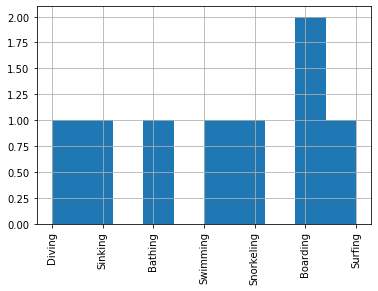

In [20]:
hist_year(attacks)